<a href="https://colab.research.google.com/github/iam-fern/real_data/blob/main/China_Health_and_Nutrition_Survey_(CHNS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
from google.colab import drive
from google.colab import files

In [32]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# where your file is located
FILE_LOCATION = '/content/drive/My Drive/pattern_realdata/pexam_pub_12.sas7bdat'

In [34]:
df = pd.read_sas(FILE_LOCATION)
df
#df.head()

/usr/local/lib/python3.7/dist-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")


,IDind,U25,U26,U27,U28,U29,U34,U35,U36,U424,...,U16,U17,U18,U19,U1D,CM1,U7_91,U8_91,U9_91,temp
0,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.111010e+11,1.0,28.0,0.0,NaN,360.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
2,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.111010e+11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
4,1.111010e+11,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126403,5.523040e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36.7
126404,5.523042e+11,1.0,18.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0
126405,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.1
126406,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0


###### **U21:** AGE (YEARS) AT 1ST MENSTRUATION  อายุ (ปี) เมื่อมีประจำเดือนครั้งแรก
###### **U22:** DIAGNOSED WITH HIGH BLOOD PRESSURE? ตรวจพบความดันโลหิตสูงหรือไม่?
###### **U23:** OF YEARS HAD HIGH BLOOD PRESSURE ปีมีความดันโลหิตสูง
###### **U24:** TAKING ANTI-HYPERTENSION DRUGS? ทานยาป้องกันความดันโลหิตสูงหรือไม่?
###### **U24A:** DIAGNOSED WITH DIABETES? วินิจฉัยว่าเป็นเบาหวานหรือไม่?
###### **U24B:** AGE (YEARS) AT DIABETES DIAGNOSIS อายุ (ปี) ที่การวินิจฉัยโรคเบาหวาน
###### **U24C:** DIABETES TREATMENT: SPECIAL DIET การรักษาโรคเบาหวาน: อาหารพิเศษ

In [35]:
table = df[['IDind', 'U24W2', 'U26']]
table

,IDind,U24W2,U26
0,1.111010e+11,NaN,NaN
1,1.111010e+11,NaN,28.0
2,1.111010e+11,64.0,NaN
3,1.111010e+11,65.0,NaN
4,1.111010e+11,NaN,NaN
...,...,...,...
126403,5.523040e+11,NaN,NaN
126404,5.523042e+11,NaN,18.0
126405,5.523042e+11,NaN,NaN
126406,5.523042e+11,NaN,NaN


In [36]:
# Define in which columns to look for missing values.
table1 = table.dropna(subset=['U24W2', 'U26'])
table1

,IDind,U24W2,U26
303,1.111040e+11,89.0,30.0
977,1.113030e+11,55.0,22.0
1052,1.113030e+11,52.0,30.0
5432,2.112031e+11,82.0,-99.0
11515,2.123050e+11,68.0,20.0
16825,2.321010e+11,50.0,20.0
20821,2.323041e+11,52.0,23.0
21631,2.324030e+11,48.0,16.0
22372,3.111010e+11,64.0,25.0
22578,3.111030e+11,60.0,18.0


In [30]:
table1.to_csv('CHNS_U24W2_U26.csv')
files.download('CHNS_U24W2_U26.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###### **U22:** DIAGNOSED WITH HIGH BLOOD PRESSURE? ตรวจพบความดันโลหิตสูงหรือไม่?
###### **U23:** OF YEARS HAD HIGH BLOOD PRESSURE ปีมีความดันโลหิตสูง
###### **U24:** TAKING ANTI-HYPERTENSION DRUGS? ทานยาป้องกันความดันโลหิตสูงหรือไม่?

In [38]:
# where your file is located
FILE_LOCATION1 = '/content/drive/My Drive/pattern_realdata/CHNS_U24W2_U26.csv'

In [42]:
df1 = pd.read_csv(FILE_LOCATION1)
df1
#df.head()

,no,IDind,U24W2,U26,RES
0,303,1.110000e+11,89,30,32.49121
1,977,1.110000e+11,55,22,-1.66472
2,1052,1.110000e+11,52,30,-4.50879
3,5432,2.110000e+11,82,-99,22.97684
4,11515,2.120000e+11,68,20,11.29629
5,16825,2.320000e+11,50,20,-6.70371
6,20821,2.320000e+11,52,23,-4.64523
7,21631,2.320000e+11,48,16,-8.78167
8,22372,3.110000e+11,64,25,7.39375
9,22578,3.110000e+11,60,18,3.25731


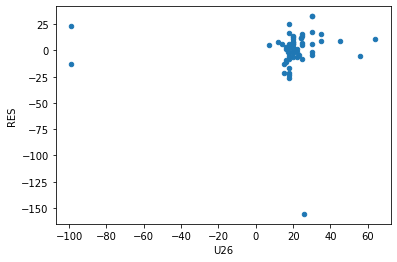

In [43]:
df1.plot(x ='U26', y='RES', kind = 'scatter')